# TP 3.1 : Test de Student

Nous nous intéressons ici au test de Student de comparaison des moyennes sur 2 échantillons indépendants simulés selon des lois normales de même variance $\sigma^2 > 0$,
\begin{equation*}
X_1,\dots,X_p \sim \mathcal{N}(m_X,\sigma^2) \quad \text{et} \quad Y_1,\dots,Y_q \sim \mathcal{N}(m_Y,\sigma^2).
\end{equation*}
Pour expérimenter, nous prendrons $p=q=10$, $m_X=m_Y=0$ et $\sigma^2=1$.

In [82]:
# Génération des échantillons
x <- rnorm(10)
y <- rnorm(10)

Le test bilatéral de comparaison des moyennes sur ces 2 échantillons se fait en utilisant la fonction `t.test()` avec l'option `var.equal=TRUE`.

In [83]:
# Test bilatéral de comparaison des moyennes
resultat_test <- t.test(x, y, var.equal=TRUE)

# L'objet obtenu contient beaucoup d'informations
resultat_test


	Two Sample t-test

data:  x and y
t = 1.6508, df = 18, p-value = 0.1161
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.153818  1.282204
sample estimates:
 mean of x  mean of y 
 0.1190167 -0.4451765 


<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Donner l'hypothèse nulle $H_0$ et l'hypothèse alternative $H_1$ de ce test.</li>
        <li>Pourquoi faut-il supposer que les deux échantillons aient la même variance ? En particulier, quelle est la loi de la variable
            \begin{equation*}
                (p+q-2)\frac{\tilde{\sigma}^2_{p,q}}{\sigma^2} \quad \text{où} \quad \tilde{\sigma}^2_{p,q} = \frac{1}{p+q-2}\sum_{k=1}^p\left( X_k - \bar{X}_p \right)^2 + \frac{1}{p+q-2}\sum_{k=1}^q\left( Y_k - \bar{Y}_q \right)^2\ ?
            \end{equation*}
        </li>
        <li>En déduire la loi de la statistique de test
            \begin{equation*}
                T = \sqrt{\frac{pq}{p+q}} \times \frac{\bar{X}_p - \bar{Y}_q}{\sqrt{\tilde{\sigma}^2_{p,q}}}.
            \end{equation*}
        </li>
        <li>Vérifier le calcul de la statistique de test donné dans <code>resultat_test</code>.</li>
        <li>Quelle est la p-valeur du test <code>resultat_test</code> ? Pour un niveau de 95%, doit-on accepter ou rejeter $H_0$ ? Est-ce cohérent avec notre simulation initiale ?</li>
        <li>Recalculer cette p-valeur à partir d'une loi de Student à 18 degrés de liberté.</li>
    </ol>
</div>

1. Hypothèse nulle $H_{0}$ : $\overline{X_{p}} - \overline{Y_{q}} = 0$

Hypothèse alternative $H_{1}$ : $\overline{X_{p}} - \overline{Y_{q}} \neq 0$

2. Les échantillons doivent avoir la même variance sinon cela fait trop d'inconnues dans le problème pour tester uniquement les moyennes. La variable $(p+q-2)\frac{\tilde{\sigma}^2_{p,q}}{\sigma^2} \quad$ où $\quad \tilde{\sigma}^2_{p,q} = \frac{1}{p+q-2}\sum_{k=1}^p\left( X_k - \bar{X}_p \right)^2 + \frac{1}{p+q-2}\sum_{k=1}^q\left( Y_k - \bar{Y}_q \right)^2$ suit la loi $\chi^2(p+q-2)$.

3. $T = \sqrt{\frac{pq}{p+q}} \times \frac{\bar{X}_p - \bar{Y}_q}{\sqrt{\tilde{\sigma}^2_{p,q}}}$ suit la loi de Student $\tau(p+q-2)$

4. 

In [84]:
p <- 10
q <- 10
sigma2 <- (1/(p+q-2))*(sum((x-mean(x))**2) + sum((y-mean(y))**2))
T <- sqrt((p*q/(p+q)))*(mean(x)-mean(y))/sqrt(sigma2)
T

[1] 1.650846

5. La p-valeur du test est p-value = 0.4201 > 0.05 donc il faut ne pas rejeter $H_{0}$

6. Calcul de la p-value à partir de la loi de Student :

In [85]:
p_value <- 2*pt(-abs(T), df=p+q-2)
p_value

[1] 0.1161092

La p-value doit être > à alpha pour que le test ait du sens : il faut que les "valeurs extrêmes" de la statistique de test puissent être observées (sinon on aurait un test qui conclut toujours au même résultat)

Pour illustrer la notion de niveau d'un test, nous simulons 1000 paires d'échantillons de taille 10 comme ci-dessus et nous les stockons dans deux matrices `X` et `Y`.

In [86]:
X <- matrix(rnorm(1000*10), nrow=1000)
Y <- matrix(rnorm(1000*10), nrow=1000)

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Effectuer un test de comparaison des moyennes pour chaque paire d'échantillons et stocker la p-valeur du résultat dans un vecteur <code>p_valeur</code> de taille 1000.</li>
        <li>Combien de p-valeurs inférieures à 0.05 obtenez-vous ? Combien devriez-vous théoriquement en obtenir en moyenne ?</li>
        <li>Repérer l'indice du test qui donne la plus petite p-valeur (il peut être utile d'utiliser la fonction <code>which.min()</code>). Pour un niveau de 95%, doit-on accepter ou rejeter $H_0$ pour ce test ?</li>
        <li>Représenter graphiquement les données correspondant à ce test :
            <ul>
                <li>afficher la densité de la loi normale centrée réduite entre -3 et 3 avec <code>plot(dnorm, -3, 3, type="l")</code>,</li>
                <li>afficher les deux échantillons avec deux couleurs différentes grâce à la fonction <code>rug()</code>,</li>
                <li>afficher les moyennes des deux échantillons (fonction <code>rug()</code>),</li>
                <li>ajouter une légende.</li>
            </ul>
            <center><img src="img/student.png"></center>
        </li>
    </ol>
</div>

In [87]:
# QUESTION 1
sigma2_1000 <- (1/(p+q-2))*(apply((X-apply(X,1,mean))**2, 1,sum)+apply((Y-apply(Y,1,mean))**2, 1,sum))
T_1000 <- sqrt((p*q/(p+q)))*(apply(X,1,mean)-apply(Y,1,mean))/sqrt(sigma2_1000)

# t.test(X[50,], Y[50,])
# T_1000[50]

p_valeur <- 2*pt(-abs(T_1000), df=p+q-2)

# TODO : fix p-value

In [88]:
# QUESTION 2

sum(p_valeur<0.05)
cat("En moyenne, on devrait avoir 5% des 1000 échantillons -> 50")

[1] 49

En moyenne, on devrait avoir 5% des 1000 échantillons -> 50

In [94]:
# QUESTION 3 

test_min_p_value <- which.min(p_valeur)
p_valeur[test_min_p_value]

cat("On rejette ce test pour un niveau de 95% car sa p-value est plus petite que 0.05")

[1] 7.035053e-05

On rejette ce test pour un niveau de 95% car sa p-value est plus petite que 0.05

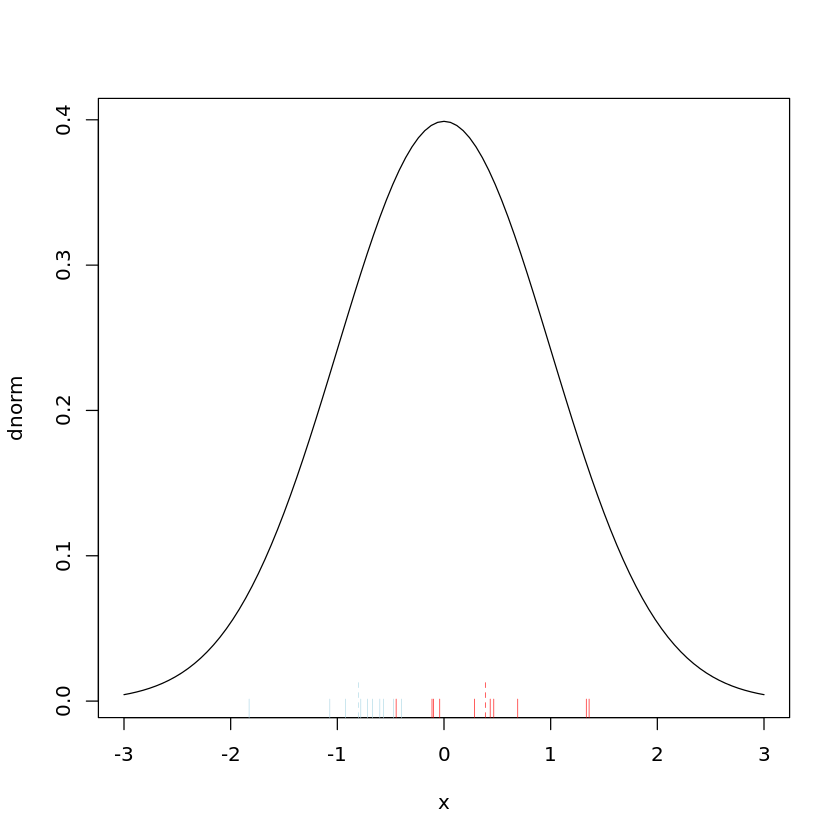

In [103]:
# QUESTION 4

plot(dnorm, -3, 3, type="l")
rug(X[test_min_p_value,], col = 'light blue')
rug(Y[test_min_p_value,], col = 'red')
rug(mean(X[test_min_p_value,]), col = 'light blue', ticksize = 0.06, lty=2)
rug(mean(Y[test_min_p_value,]), col = 'red', ticksize = 0.06, lty=2)